<div align="center">

# 3.0 Exploratory Data Analysis (EDA)

## 3.1 Table of Contents<a id='3.1_Table_of_Contents'></a>
* [3.1 Table of Contents](#3.1_Table_of_Contents)
* [3.2 Introduction](#3.2_Introduction)
* [3.3 Library Imports](#3.3_Library_Imports)
* [3.4 Data Loading](#3.4_Data_Loading)
* [3.5 Data Overview](#3.5_Data_Overview)
  * [3.5.1 Data Structure](#3.5.1_Data_Structure)
  * [3.5.2 Correlation Overview](#3.5.2_Correlation_Overview)
* [3.6 Feature Analysis](#3.6_Feature_Analysis)
  * [3.6.1 Numerical Features](#3.6.1_Numerical_Features)
  * [3.6.2 Categorical Features](#3.6.2_Categorical_Features)
  * [3.6.3 Numerical vs Categorical](#3.6.3_Numerical_vs_Categorical)
* [3.7 Outlier Analysis](#3.7_Outlier_Analysis)
* [3.8 Summary](#3.8_Summary)

## 3.2 Introduction<a id='3.2_Introduction'></a>

This notebook performs Exploratory Data Analysis (EDA) on the cleaned dataset to:

* Understand feature distributions

* Detect relationships and correlations

* Identify patterns, trends, and anomalies

* Prepare insights for feature engineering and modeling

## 3.3 Library Imports<a id='3.3_Library_Imports'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [2]:
# display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# Plot style
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

## 3.4 Data Loading<a id='3.4_Data_Loading'></a>

In [3]:
# Load preprocessed data from previous step
df = pd.read_csv('../data/processed/data_01_cleaned.csv')

print(f"Shape: {df.shape}")

Shape: (272, 26)


## 3.5 Data Overview<a id='3.5_Data_Overview'></a>

### 3.5.1 Data Structure<a id='3.5.1_Data_Structure'></a>

In [4]:
df.info()
df.sample(5).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   272 non-null    object 
 1   region                 272 non-null    object 
 2   state                  272 non-null    object 
 3   summit_elevation_ft    272 non-null    int64  
 4   vertical_drop_ft       272 non-null    int64  
 5   base_elevation_ft      272 non-null    int64  
 6   num_trams              272 non-null    int64  
 7   fast_six_lifts         272 non-null    int64  
 8   fast_quad_lifts        272 non-null    int64  
 9   quad_lifts             272 non-null    int64  
 10  triple_lifts           272 non-null    int64  
 11  double_lifts           272 non-null    int64  
 12  surface_lifts          272 non-null    int64  
 13  total_chairs           272 non-null    int64  
 14  num_runs               272 non-null    float64
 15  terrai

,156,175,177,53,45
name,Gore Mountain,Titus Mountain,West Mountain,Big Squaw Mountain Ski Resort,Chestnut Mountain Resort
region,New York,New York,New York,Maine,Illinois
state,New York,New York,New York,Maine,Illinois
summit_elevation_ft,3600,2025,1470,3200,1040
vertical_drop_ft,2537,1200,1010,660,475
base_elevation_ft,998,825,460,1750,565
num_trams,1,0,0,0,0
fast_six_lifts,0,0,0,0,0
fast_quad_lifts,2,0,0,0,0
quad_lifts,2,0,0,0,2


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,272,271,Crystal Mountain,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,272,37,New York,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,272,34,New York,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
summit_elevation_ft,272.0,NaN,NaN,NaN,4316.588235,3603.29323,440.0,1400.0,2483.0,7335.0,13487.0
vertical_drop_ft,272.0,NaN,NaN,NaN,1113.338235,849.253953,60.0,440.0,827.5,1600.0,4425.0
base_elevation_ft,272.0,NaN,NaN,NaN,3191.172794,3062.054191,100.0,863.75,1380.0,5855.0,10800.0
num_trams,272.0,NaN,NaN,NaN,0.113971,0.444179,0.0,0.0,0.0,0.0,3.0
fast_six_lifts,272.0,NaN,NaN,NaN,0.095588,0.362009,0.0,0.0,0.0,0.0,2.0
fast_quad_lifts,272.0,NaN,NaN,NaN,0.735294,1.751058,0.0,0.0,0.0,1.0,15.0
quad_lifts,272.0,NaN,NaN,NaN,0.963235,1.31642,0.0,0.0,0.5,2.0,8.0


### 3.5.2 Correlation Overview<a id='3.5.2_Correlation_Overview'></a>

In [6]:
# Check missing values
df.isna().sum()

name                     0
region                   0
state                    0
summit_elevation_ft      0
vertical_drop_ft         0
base_elevation_ft        0
num_trams                0
fast_six_lifts           0
fast_quad_lifts          0
quad_lifts               0
triple_lifts             0
double_lifts             0
surface_lifts            0
total_chairs             0
num_runs                 0
terrain_parks            0
longest_run_mi           0
skiable_terrain_acres    0
snow_making_acres        0
days_open_last_year      0
years_open               0
average_snowfall_in      0
adult_weekday_price      0
adult_weekend_price      0
projected_days_open      0
night_skiing_acres       0
dtype: int64

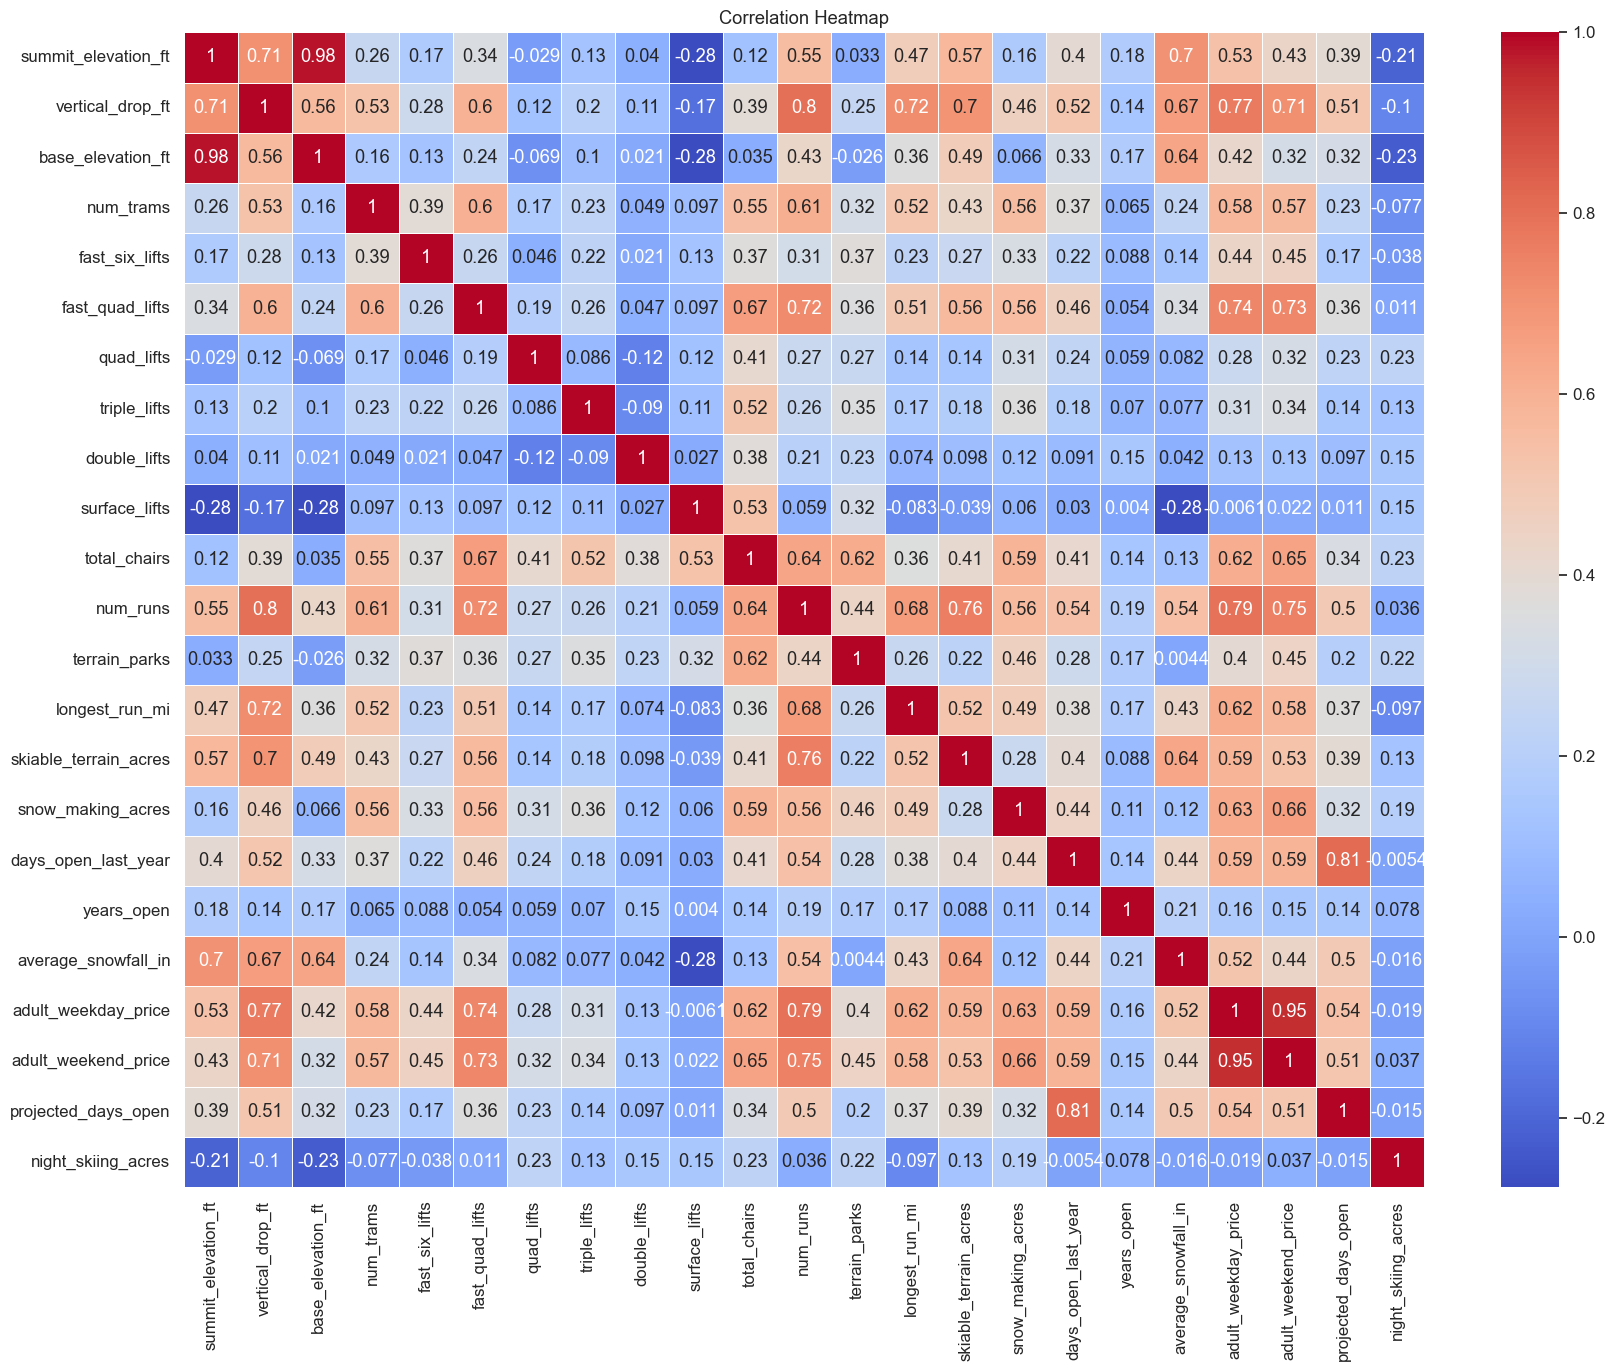

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Note:
1. The two target variables, `adult_weekday_price` and `adult_weekend_price`, are strongly correlated.
2. `summit_elevation_ft` and `base_elevation_ft` are also strongly correlated.

## 3.6 Feature Analysis<a id='3.6_Feature_Analysis'></a>

### 3.6.1 Numerical Features<a id='3.6.1_Numerical_Features'></a>

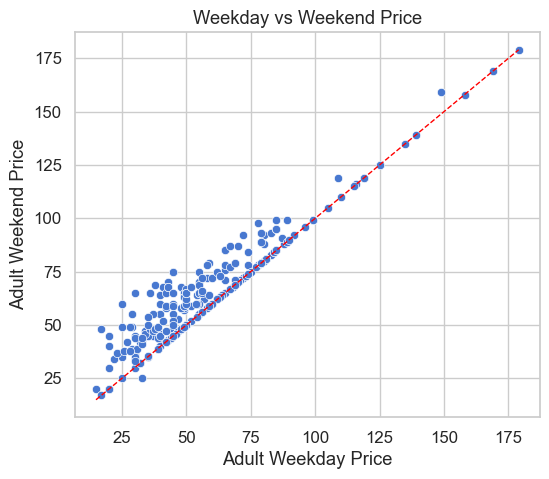

In [8]:
# Plot two target variables 'adult_weekday_price' and 'adult_weekend_price'
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x='adult_weekday_price',
    y='adult_weekend_price'
)

# Add y = x line
min_val = min(df['adult_weekday_price'].min(), df['adult_weekend_price'].min())
max_val = max(df['adult_weekday_price'].max(), df['adult_weekend_price'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1)

plt.title('Weekday vs Weekend Price')
plt.xlabel('Adult Weekday Price')
plt.ylabel('Adult Weekend Price')
plt.grid(True)
plt.show()


### Note:
For most resorts, `adult_weekend_price` is equal to or slightly higher than `adult_weekday_price`, and the two variables are strongly correlated, so `adult_weekend_price` is retained for subsequent visualizations.

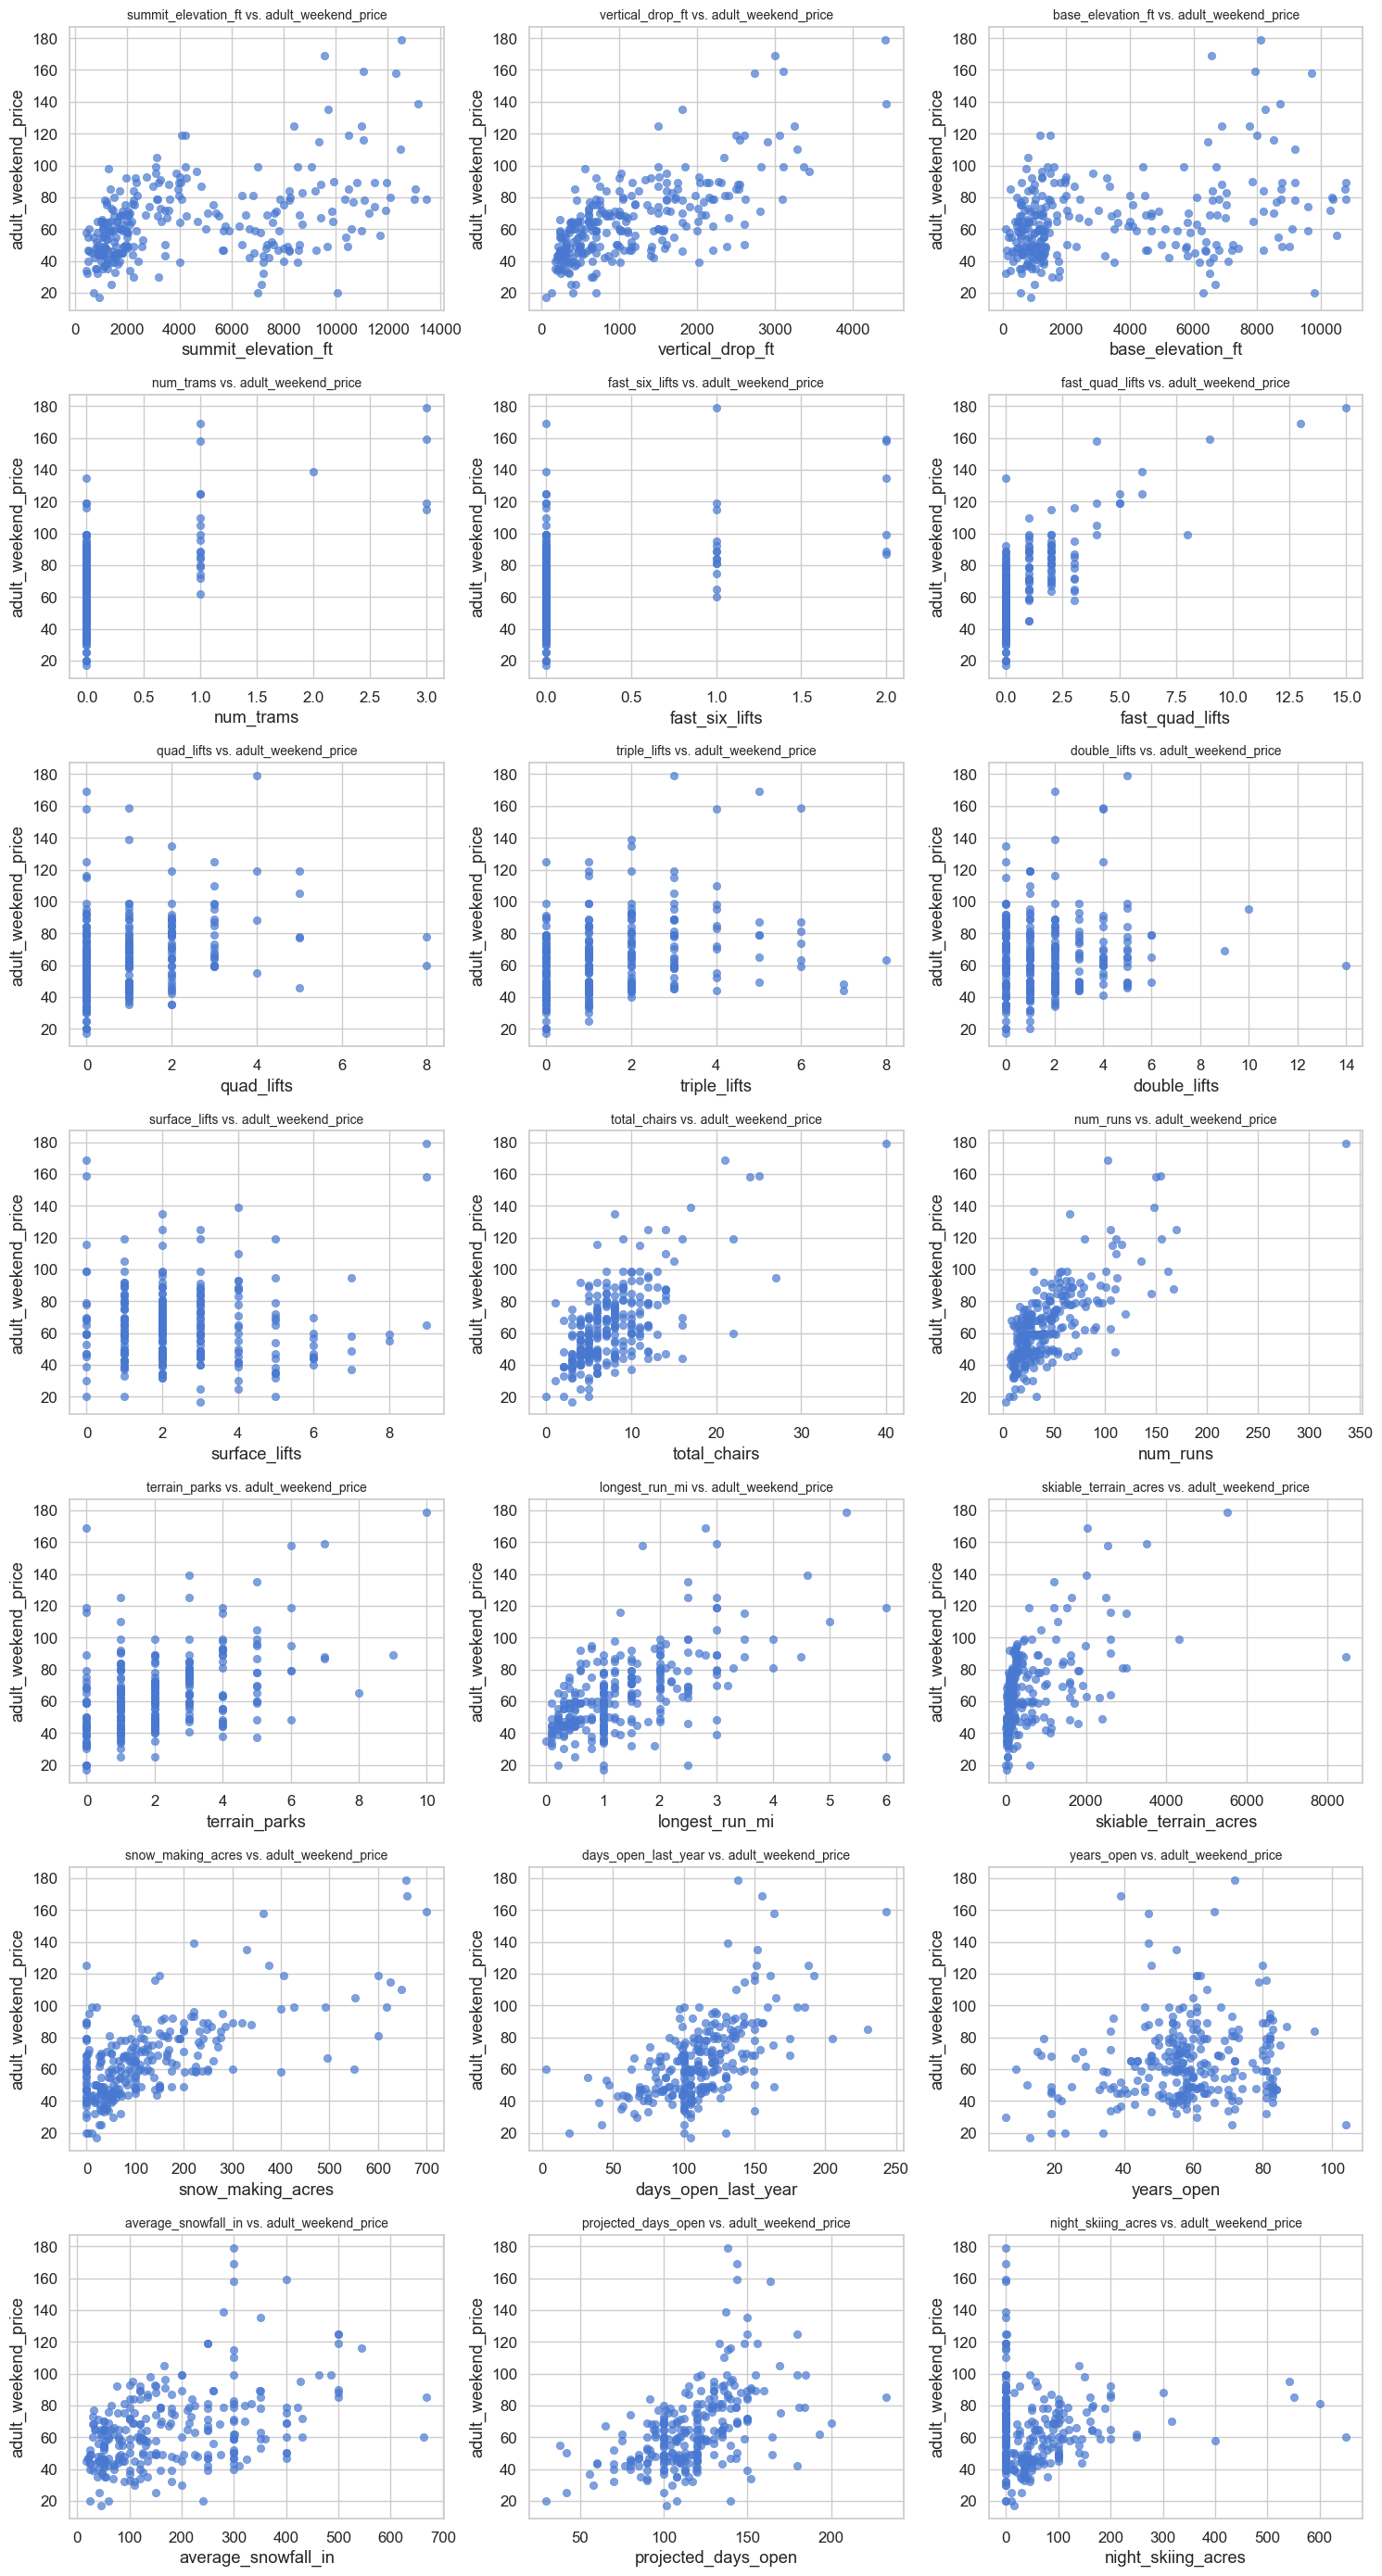

In [9]:
# Exclude target variable 'adult_weekend_price' from numeric list
num_cols = df.select_dtypes(include=[np.number]).columns.drop(['adult_weekday_price','adult_weekend_price'])

# Determine layout
cols_per_row = 3
n_cols = len(num_cols)
n_rows = math.ceil(n_cols / cols_per_row)

# Create subplots
fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(cols_per_row * 5, n_rows * 4))
axes = axes.flatten()

# Plot scatterplots for each numerical variable
for i, col in enumerate(num_cols):
    sns.scatterplot(
        x=df[col],
        y=df['adult_weekend_price'],
        ax=axes[i],
        alpha=0.7,
        edgecolor=None
    )
    axes[i].set_title(f'{col} vs. adult_weekend_price', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('adult_weekend_price')

# Hide empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Note:
Most numerical variables show a **positive correlation** with `adult_weekend_price`.  
This indicates that ski resorts with larger terrain areas, higher elevations, and better facilities tend to have **higher ticket prices**, but the strength of correlation varies across features.

### 3.6.2 Categorical Features<a id='3.6.2_Categorical_Features'></a>

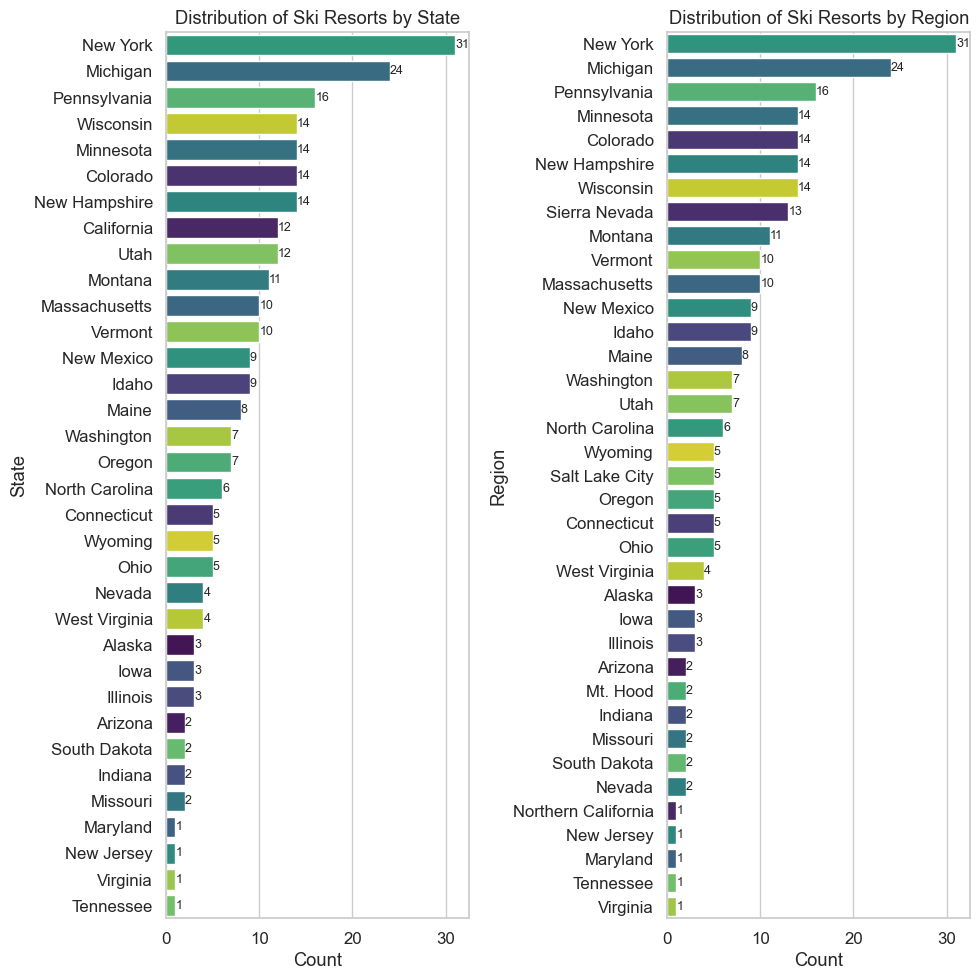

In [10]:
# Distribution of Categorical Variables
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# --- Plot 1: Distribution by State (Horizontal) ---
sns.countplot(
    data=df,
    y='state',                # put 'state' on Y-axis
    hue='state',              # to enable palette
    legend=False,
    order=df['state'].value_counts().index,
    ax=axes[0],
    palette='viridis'
)
axes[0].set_title('Distribution of Ski Resorts by State')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('State')

# Add count labels
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=9)

# --- Plot 2: Distribution by Region (Horizontal) ---
sns.countplot(
    data=df,
    y='region',               # put 'region' on Y-axis
    hue='region',
    legend=False,
    order=df['region'].value_counts().index,
    ax=axes[1],
    palette='viridis'
)
axes[1].set_title('Distribution of Ski Resorts by Region')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Region')

# Add count labels
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

### Note:
New York ranks **first** with **31 ski resorts**, likely due to its favorable **climate, geography, and population density**.  
The **target resort**, `Big Mountain Resort`, is located in **Montana**, which has **11 ski resorts** in total.

### 3.6.3 Numerical vs Categorical<a id='3.6.3_Numerical_vs_Categorical'></a>

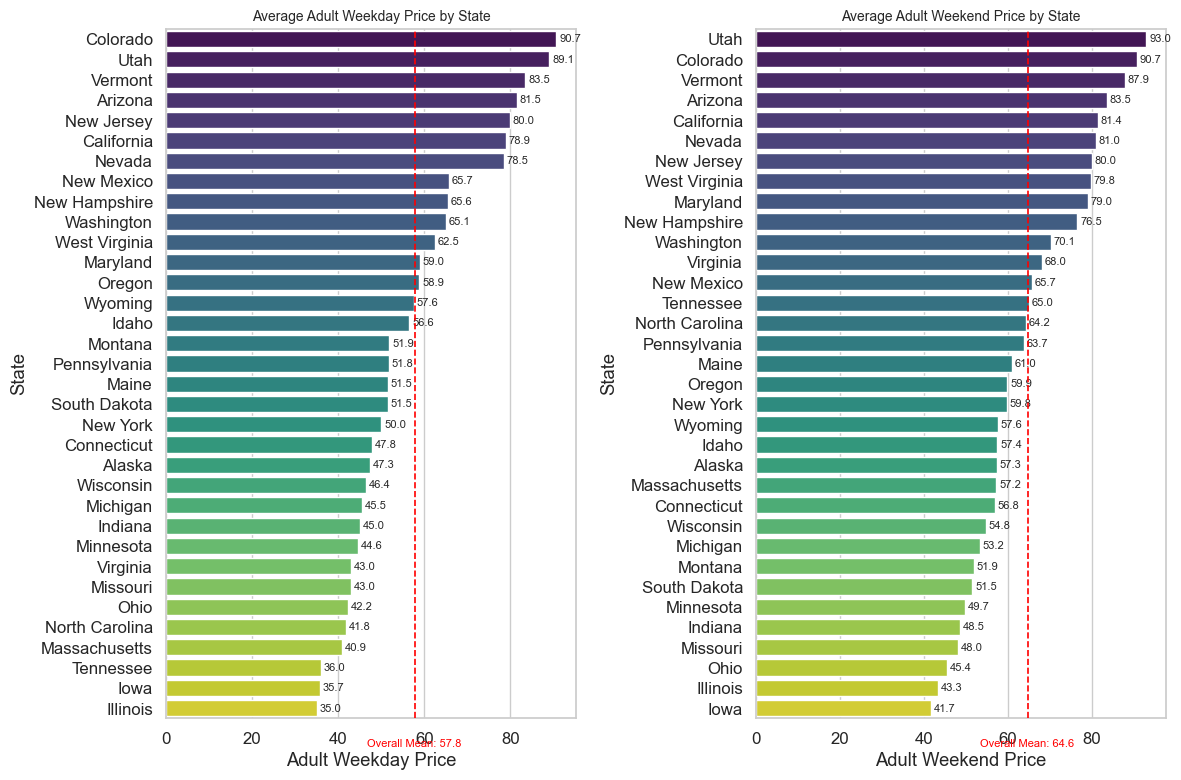

In [11]:
# Mean Value by State (Ranked) + Overall Average Line
# Select numerical columns of interest
num_cols = [
    'adult_weekday_price',
    'adult_weekend_price',
]

# Compute mean values by state
state_means = df.groupby('state')[num_cols].mean().reset_index()

# Plot each variable's mean by state (ranked)
cols_per_row = 2
n_cols = len(num_cols)
n_rows = math.ceil(n_cols / cols_per_row)

fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(cols_per_row * 6, n_rows * 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # Sort by mean for ranking
    sorted_df = state_means.sort_values(by=col, ascending=False)
    overall_mean = df[col].mean()  # overall mean across all states

    sns.barplot(
        data=sorted_df,
        y='state',
        x=col,
        hue='state',          # fixes Seaborn >=0.14 palette warning
        legend=False,
        palette='viridis',
        ax=axes[i]
    )
    # Pretty title/labels
    pretty = col.replace("_", " ").title()
    axes[i].set_title(f'Average {pretty} by State', fontsize=10)
    axes[i].set_xlabel(pretty)
    axes[i].set_ylabel('State')

    # Add vertical line for overall mean (ensure it sits on top)
    axes[i].axvline(x=overall_mean, color='red', linestyle='--', linewidth=1.2, zorder=5)

    # Add text label just below the lowest bar area (robust to axis ranges)
    y_min, y_max = axes[i].get_ylim()
    axes[i].text(
        overall_mean,
        y_min - (y_max - y_min) * 0.03,
        f'Overall Mean: {overall_mean:.1f}',
        color='red',
        fontsize=8,
        ha='center',
        va='top'
    )

    # Label each bar with mean value
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=2)

# Hide unused subplots (in case num_cols isn't a multiple of cols_per_row)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Note:
The overall **average ticket price** is **57.8 on weekdays** and **64.4 on weekends**.  
States such as **Colorado, Utah, Vermont, Arizona, and New Jersey** rank among the highest,  
with average prices exceeding **$80** for both weekday and weekend tickets.  

In contrast, **Montana**, where the target resort *Big Mountain Resort* is located,  
has an average price of approximately **$51.9** for both weekday and weekend tickets —  
notably **below the national average**, suggesting a more moderate pricing strategy.

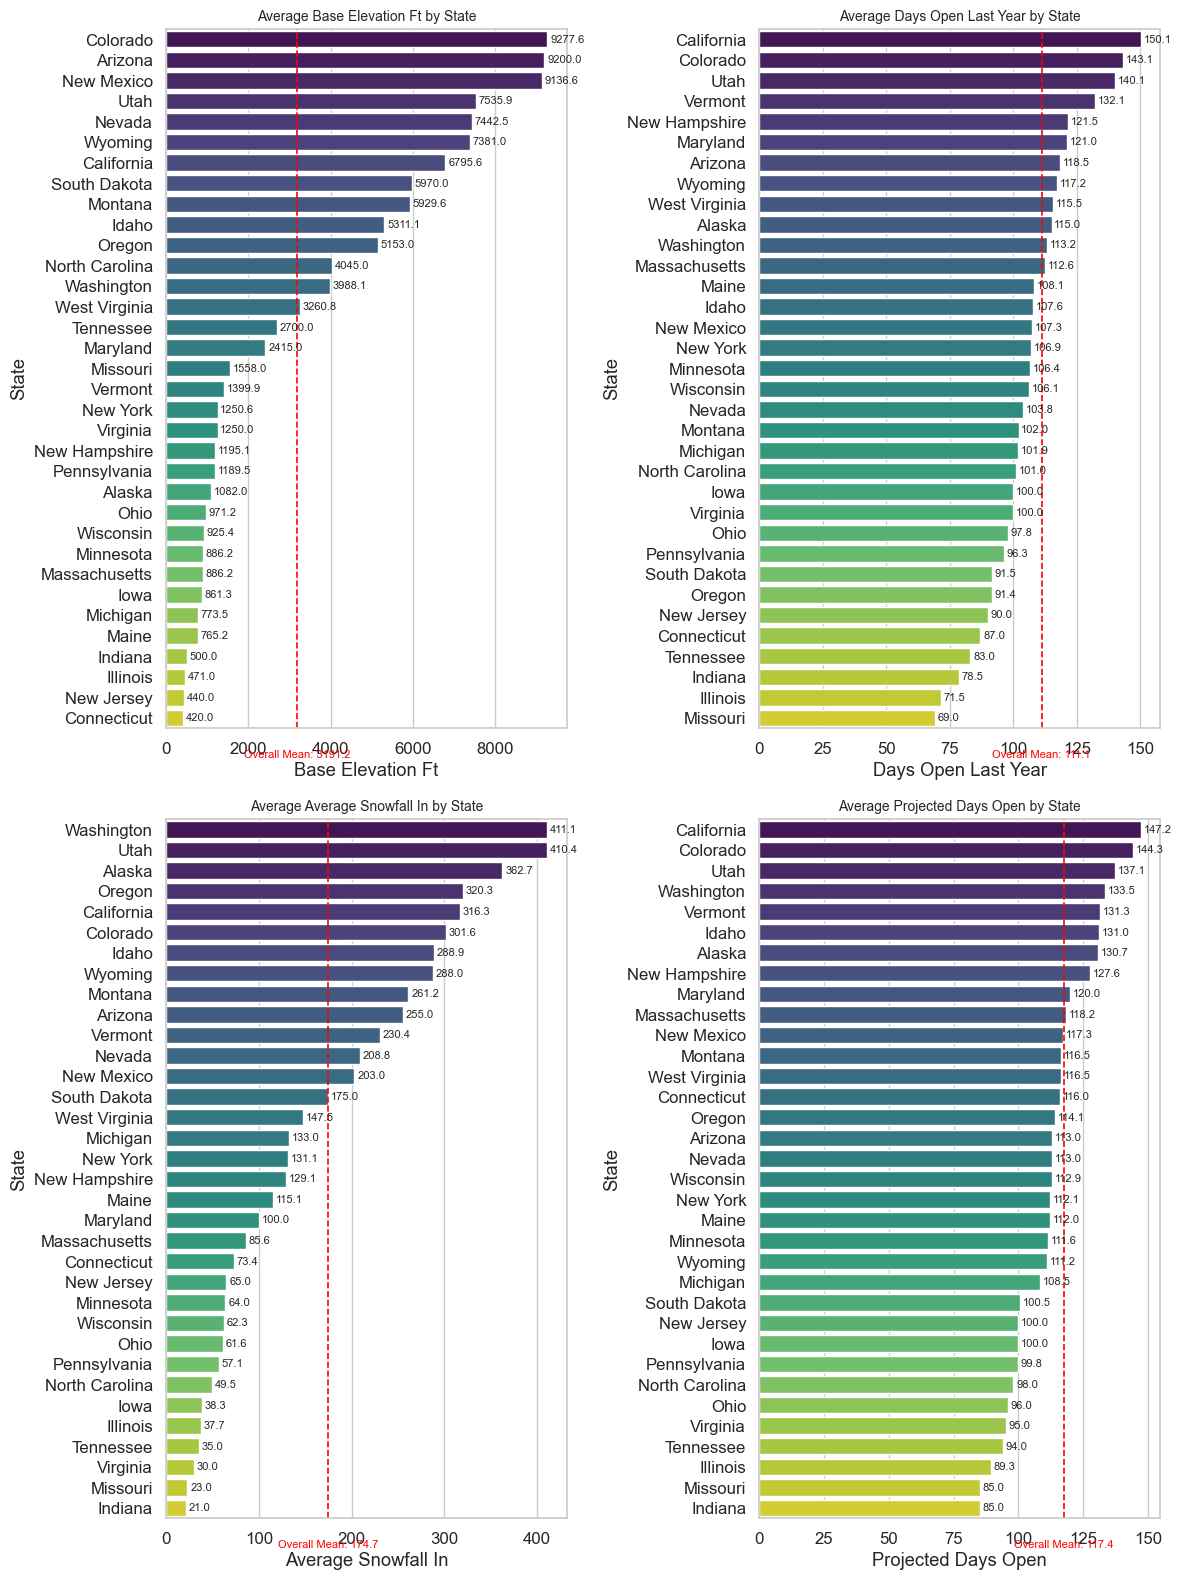

In [12]:
# Mean Value by State (Ranked) + Overall Average Line
# Select numerical columns of interest
num_cols = [
    'base_elevation_ft',
    'days_open_last_year',
    'average_snowfall_in',
    'projected_days_open'
]

# Compute mean values by state
state_means = df.groupby('state')[num_cols].mean().reset_index()

# Plot each variable's mean by state (ranked)
cols_per_row = 2
n_cols = len(num_cols)
n_rows = math.ceil(n_cols / cols_per_row)

fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(cols_per_row * 6, n_rows * 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # Sort by mean for ranking
    sorted_df = state_means.sort_values(by=col, ascending=False)
    overall_mean = df[col].mean()  # ✅ overall mean across all states

    sns.barplot(
        data=sorted_df,
        y='state',
        x=col,
        hue='state',          # fixes future warning
        legend=False,
        palette='viridis',
        ax=axes[i]
    )
    axes[i].set_title(f'Average {col.replace("_", " ").title()} by State', fontsize=10)
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('State')

    # Add horizontal line for overall average
    axes[i].axvline(x=overall_mean, color='red', linestyle='--', linewidth=1.2)
    
    # Add text label slightly below the lowest bar
    y_min, y_max = axes[i].get_ylim()
    axes[i].text(
        overall_mean,
        y_min - (y_max - y_min) * 0.03,
        f'Overall Mean: {overall_mean:.1f}',
        color='red',
        fontsize=8,
        ha='center',
        va='top'
    )

    # Label each bar with mean value
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=2)

# Hide any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Note:
Overall, states with stronger **geographical advantages** and **longer ski seasons** tend to exhibit **higher average ticket prices**.

**Elevation:**  
**Colorado, Arizona, and New Mexico** hold the **top three positions** in average base elevation, each exceeding **9,000 ft**.  
**Montana**, home to *Big Mountain Resort*, averages **5,929 ft**, which is **above the overall mean of 3,191 ft**.  
Higher-elevation states typically offer better snow quality and longer runs, contributing to **premium pricing**.

**Days Open:**  
**California, Colorado, and Utah** rank highest in **average operational days**, each surpassing **140 days per year**.  
These states also maintain some of the **most expensive ticket prices**, highlighting the link between  
season length and pricing.  
**Montana** averages **102 days open**, **below the overall mean of 111 days**, suggesting a moderately shorter season.

**Snowfall:**  
**Washington** and **Utah** lead the nation with **over 411 inches of average snowfall per year**,  
which supports higher ticket prices due to superior snow reliability and depth.  
**Montana** receives an average of **261 inches**, **above the overall mean of 175 inches**,  
indicating strong natural snow conditions despite its more affordable pricing.

**Projected Days Open:**  
**California** and **Colorado** again top the list with **over 140 projected open days**,  
reflecting favorable conditions and efficient resort management.  
**Montana’s** projected average of **116 days** is **slightly below the overall mean of 117 days**,  
consistent with its moderate pricing tier.

In summary, **Colorado, Utah, and California** dominate across multiple environmental and operational metrics —  
**high elevation, long seasons, and heavy snowfall** — which aligns with their **higher average ticket prices**.  
In contrast, *Big Mountain Resort* in **Montana**, while enjoying strong natural conditions,  
maintains a **below-average price**, positioning it as a **value-driven destination** in the ski market.


## 3.7 Outlier Analysis<a id='3.7_Outlier_Analysis'></a>

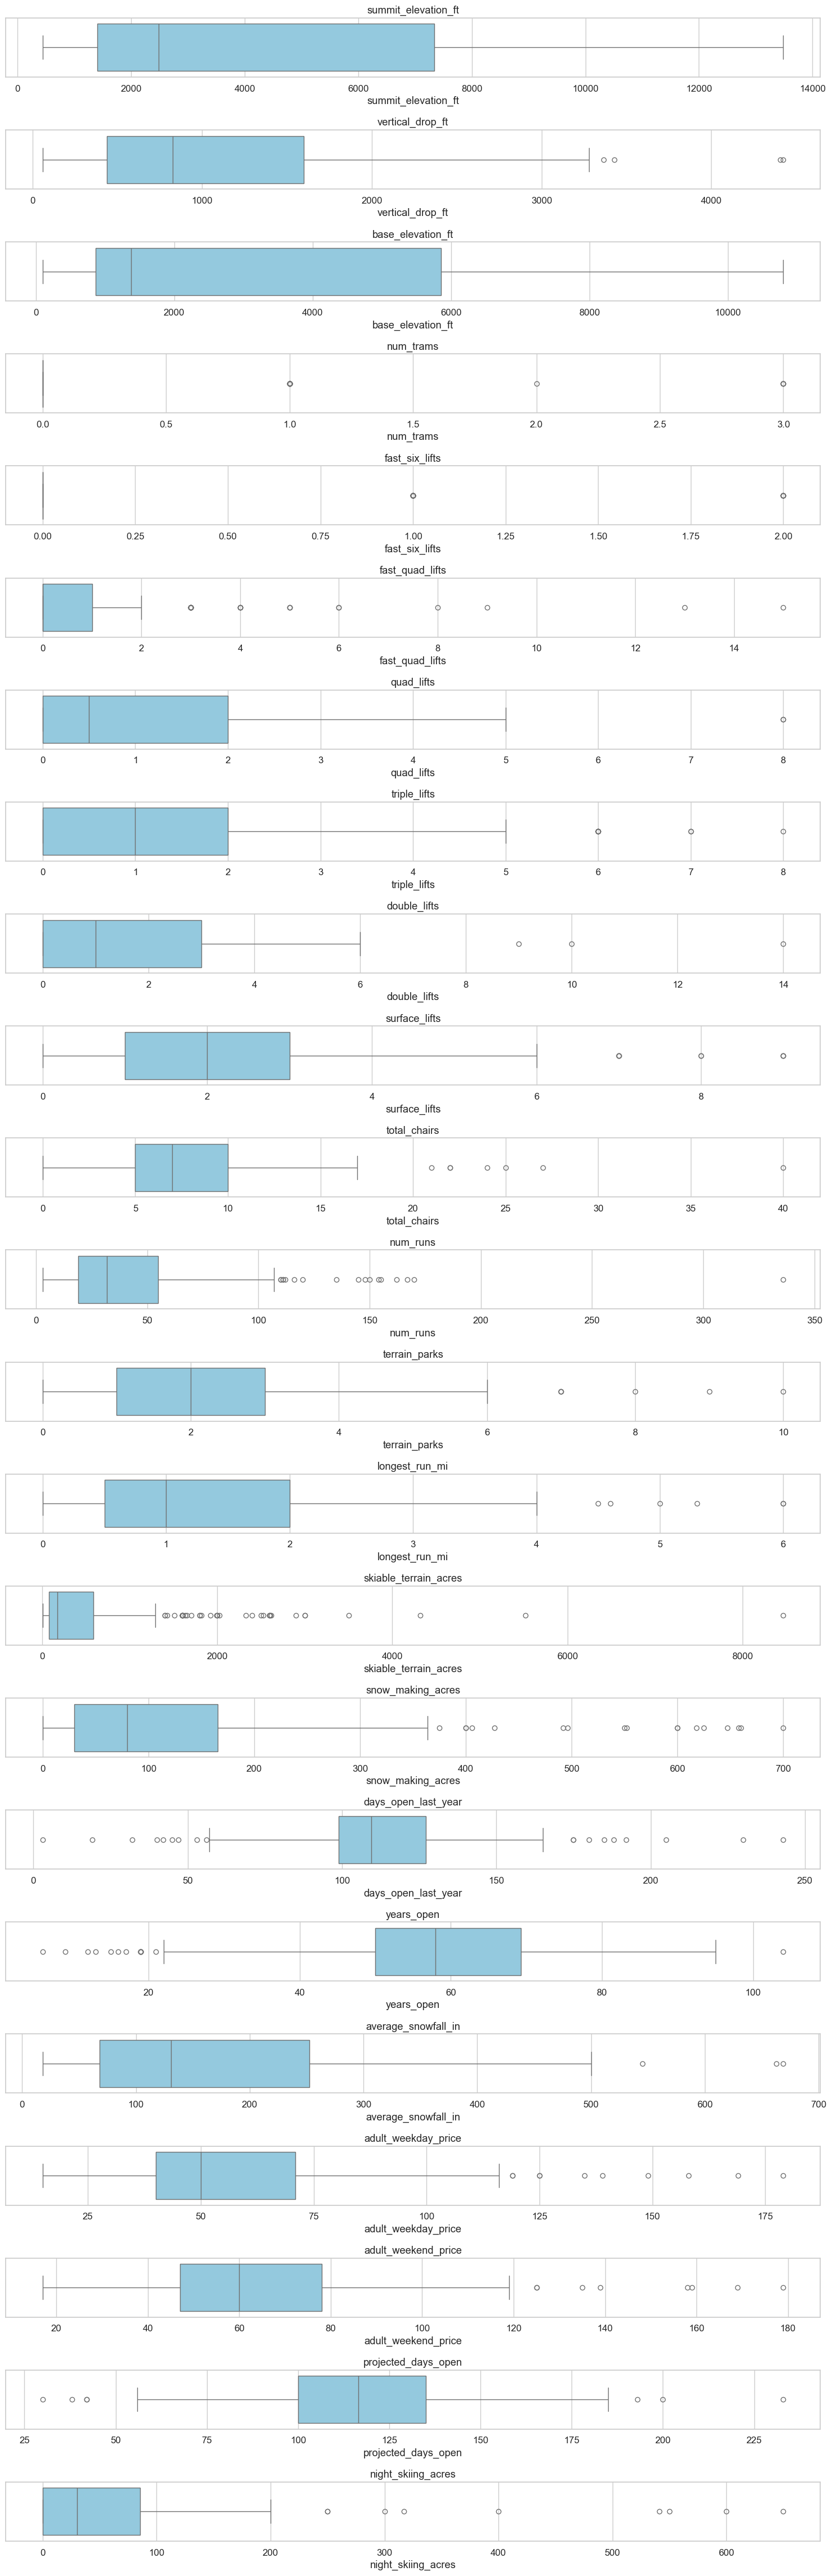

In [13]:
# Boxplots of numerical variables
num_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, len(num_cols)*2))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


### Note:
Most numerical variables contain data points that **extend beyond the interquartile range (IQR)**, indicating potential outliers.  
However, these values appear **reasonable in real-world contexts** and represent genuine variations among ski resorts.  
Therefore, all observations will be **retained for modeling**.

## 3.8 Summary<a id='3.8_Summary'></a>

The Exploratory Data Analysis (EDA) provides key insights into the characteristics, relationships, and patterns within the ski resort dataset.

**1. Overall Data Structure**
The dataset contains 330 ski resorts with 27 variables, covering geographical, operational, and pricing information.  
No missing values or duplicates remain after cleaning.  

**2. Correlations**
- The two target variables, `adult_weekday_price` and `adult_weekend_price`, are **strongly correlated**, with weekend prices slightly higher on average.  
- Elevation-related variables (`summit_elevation_ft`, `base_elevation_ft`) show high internal correlation, suggesting similar explanatory potential.  
- Several operational and environmental factors, including **terrain size, elevation, snowfall, and open days**, exhibit **positive correlation** with ticket prices.

**3. Univariate and Bivariate Patterns**
- **Ticket Prices:** Most resorts have weekday and weekend prices between $40–$80, with top states (Colorado, Utah, Vermont, Arizona, and New Jersey) averaging above $80.  
  Montana’s prices (~$52) are below the overall mean, positioning *Big Mountain Resort* in a mid-range pricing tier.  
- **Elevation & Geography:** High-elevation states (Colorado, Arizona, New Mexico) exceed 9,000 ft on average and tend to charge higher prices due to premium terrain and snow quality.  
- **Season Duration:** States such as California, Colorado, and Utah average over 140 open days, reinforcing their strong pricing power.  
- **Snowfall:** Washington and Utah record the heaviest average snowfall (>400 inches), aligning with higher price levels.  
- **Montana:** Despite favorable conditions (5,929 ft elevation, 261 inches of snow), Montana maintains lower-than-average prices, indicating a **value-oriented market**.

**4. Outliers**
Some variables contain values beyond the interquartile range (IQR), particularly in elevation, terrain size, and snowfall.  
However, these are **plausible real-world values** reflecting the diversity of ski resorts, and all observations are **retained for modeling**.

---

**Key Takeaways for Modeling**
- `adult_weekend_price` will serve as the **primary target variable** for predictive modeling.  
- Variables such as **elevation**, **snowfall**, and **days open** are likely strong predictors of pricing.  
- Correlated features (e.g., `summit_elevation_ft` and `base_elevation_ft`) may require **feature selection or dimensionality reduction** to prevent redundancy.  
- Outlier retention ensures the model captures realistic market variations across resort sizes and locations.

✅ The analyzed dataset is now ready for **feature engineering** and **model development** in the next notebook.

In [14]:
output_path = "../data/processed/data_02_analyzed.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)
print(f"✅ Updated data saved to {output_path}")
print(f"Shape: {df.shape}")

✅ Updated data saved to ../data/processed/data_02_analyzed.csv
Shape: (272, 26)
